# Portifolio study and optimization

    This project was made by LEONE Leonardo

    <
    leonardo.leone1998@gmail.com
    >

## Importing useful libraries for the project

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from datetime import datetime

## Loading historical data

In [2]:
# Checking a random ticked to see what we get
amzn : yf.ticker.Ticker = yf.Ticker("AMZN")

# GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
initial_date : str = "2019-07-29"
end_date : str = datetime.today().strftime('%Y-%m-%d')
amzn_hist : pd.core.series.Series= amzn.history(start = initial_date, end = end_date)
amzn_hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-07-29 00:00:00-04:00,96.500000,96.611504,94.527000,95.622498,89864000,0.0,0.0
2019-07-30 00:00:00-04:00,94.556000,95.494499,94.174004,94.926498,58218000,0.0,0.0
2019-07-31 00:00:00-04:00,94.905502,94.977501,92.472000,93.338997,89414000,0.0,0.0
2019-08-01 00:00:00-04:00,93.585999,94.896004,92.200500,92.765999,94266000,0.0,0.0
2019-08-02 00:00:00-04:00,92.253502,92.318001,90.401001,91.162003,99124000,0.0,0.0


### Visualizing the data using CandleSticks

For this plot I put a rough aproximation of where the Corona Virus is located (it is a gross approximation)
    . It is just for reference, it will not impact the rest of the project, but it is interesting to see it

In [3]:
fig = go.Figure(data = [go.Candlestick(x = amzn_hist.index,
                open =amzn_hist['Open'],
                high = amzn_hist['High'],
                low = amzn_hist['Low'],
                close = amzn_hist['Close'])])
fig.update_layout(
    title='Visualizing the historical data using Candlestick',
    yaxis_title='Amazon Stock',
    shapes = [dict(
    x0='2020-04-15', x1='2023-01-01', y0=0, y1=1, xref='x', yref='paper',
    line_width=2)],

    annotations=[dict(
    x='2020-04-15', y=0.05, xref='x', yref='paper',
    showarrow=False, xanchor='left', text='SaRS-Cov period aproximation')])

fig.show()

## Loading different stocks
In the amzn historical DF one has several columns, but the goal here will be to analyse the "Close" column and see it with respect to other stocks

In [4]:
# Create a pd.Dataframe
df_stocks : pd.core.frame.DataFrame = pd.DataFrame()

# modify the df to puth the close values of the selected stocks
def get_stock(dataframe : pd.core.frame.DataFrame, stock_list: list, initial_date : str, end_date : str):

    for i in stock_list:

        stock : yf.ticker.Ticker = yf.Ticker(i)

        # GET TODAYS DATE AND CONVERT IT TO A STRING WITH YYYY-MM-DD FORMAT (YFINANCE EXPECTS THAT FORMAT)
        dataframe[i] : pd.core.series.Series= stock.history(start = initial_date, end = end_date)["Close"]

    return dataframe

initial_date : str = "2017-07-29"
end_date : str = "2022-07-29"
stock_list : list = ['AMZN','GOOGL','WMT','TSLA','META',
                     'IBM', 'TSCO', 'NVDA', 'BABA', 'JPM', 
                     'BBD'] 

df = get_stock(df_stocks, stock_list, initial_date, end_date)

df.head()

,AMZN,GOOGL,WMT,TSLA,META,IBM,TSCO,NVDA,BABA,JPM,BBD
Date,,,,,,,,,,,
2017-07-31 00:00:00-04:00,49.389000,47.275002,71.597137,21.564667,169.250000,103.915680,51.336010,40.143345,154.949997,77.232330,6.075286
2017-08-01 00:00:00-04:00,49.809502,47.327999,72.053612,21.304667,169.860001,104.368187,51.400036,40.632446,154.729996,78.267136,6.170013
2017-08-02 00:00:00-04:00,49.794498,47.382000,72.080460,21.726000,169.300003,103.757637,50.933506,40.607738,151.910004,78.334450,6.268591
2017-08-03 00:00:00-04:00,49.346001,47.014999,72.384811,23.139334,168.589996,104.109612,50.778015,41.124008,153.320007,77.821259,6.255956
2017-08-04 00:00:00-04:00,49.379002,47.289501,72.035713,23.794001,169.619995,104.267639,52.131859,41.304340,153.330002,78.797165,6.255956


## Plotting prices and converting it to returns

it is interesting to see the closing price of a stock yet to compare between several stocks it is usual (and more efficient) to compare returns

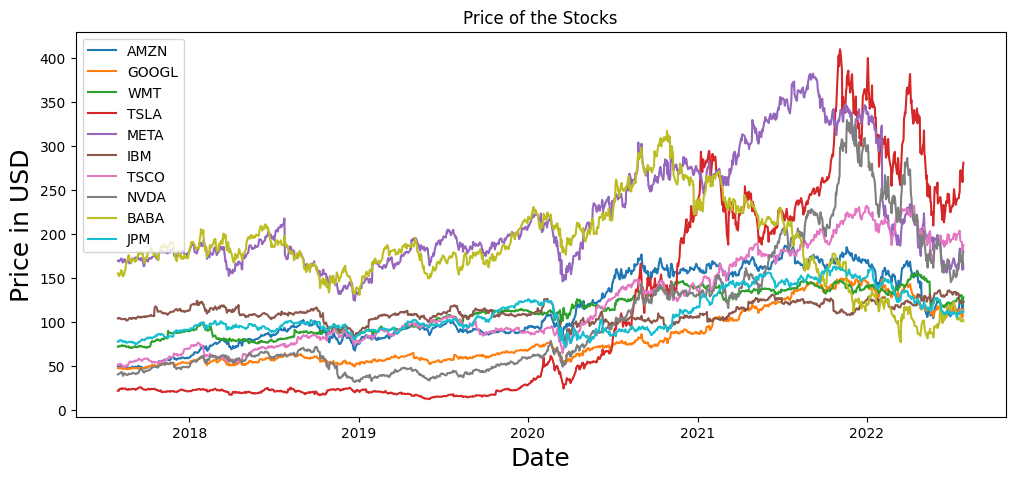

In [5]:
# plot size
plt.figure(figsize=(12,5)) 

# selecting all stocks
for i in df.columns.values[0:10]:
    plt.plot( df[i],  label=i)
plt.title('Price of the Stocks')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price in USD',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [6]:
# getting more stocks for correlation and calculation
import csv, random

tickers = []
with open('tickers.csv', newline='') as inputfile:
    for row in csv.reader(inputfile):
        tickers.append(row[0])
random.seed(2907)
random.shuffle(tickers)
tickers = tickers[0:100]

print(tickers[:5], len(tickers))

['KIQ', 'MD', 'KSU', 'SSD', 'PFL'] 100


In [7]:
# put new tickers in the df
df = get_stock(df, tickers, initial_date, end_date)


KSU: No timezone found, symbol may be delisted
TEN: No timezone found, symbol may be delisted
MIE: No timezone found, symbol may be delisted
CEL: No timezone found, symbol may be delisted
RMG: No timezone found, symbol may be delisted
AIZP: No timezone found, symbol may be delisted
LFC: No timezone found, symbol may be delisted
SYN: No timezone found, symbol may be delisted
FEAC: No timezone found, symbol may be delisted
CELP: No timezone found, symbol may be delisted
MYOV: No timezone found, symbol may be delisted
SHLX: No timezone found, symbol may be delisted
SJI: No timezone found, symbol may be delisted
HNP: No timezone found, symbol may be delisted
MTL: No timezone found, symbol may be delisted
/tmp/ipykernel_4478/1941088639.py:12: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use 

In [8]:
df = df.dropna(axis=1)
df.shape

(1258, 86)

### Converting it to returns 

In this project I will use log(return)

$$

R_i(t,t+k) = ln(\frac{P_{t+t_k}}{P_t}).\frac{360}{k}

$$

In [9]:
# to convert the values using this equation
# it is possible to use numpy to make the transformation

df_ret = np.log(df).diff()

# As we made de diff, one of the rows (the oldest one) will be empty,
# so it is necessary to take the NA values

df_ret = df_ret.dropna(axis = 0) # axis = 0 to consider the row and not the column

# visualize the result
df_ret.head()

,AMZN,GOOGL,WMT,TSLA,META,IBM,TSCO,NVDA,BABA,JPM,...,AHT,BOX,LYG,HPS,BWG,NWE,BP,OCN,CE,NQP
Date,,,,,,,,,,,,,,,,,,,,,
2017-08-01 00:00:00-04:00,0.008478,0.001120,0.006355,-0.012130,0.003598,0.004345,0.001246,0.012110,-0.001421,0.013310,...,0.006339,0.008452,0.000000,0.006741,-0.000735,0.019365,0.031651,0.000000,-0.000520,0.001464
2017-08-02 00:00:00-04:00,-0.000301,0.001140,0.000373,0.019584,-0.003302,-0.005867,-0.009118,-0.000608,-0.018393,0.000860,...,-0.017530,-0.011108,0.002837,0.001033,0.000735,0.003558,0.003578,0.000000,0.007153,0.003651
2017-08-03 00:00:00-04:00,-0.009048,-0.007776,0.004214,0.063024,-0.004203,0.003387,-0.003057,0.012633,0.009239,-0.006573,...,-0.014575,-0.003197,0.002829,-0.006214,0.007320,0.011602,-0.007169,0.006944,0.000207,0.003638
2017-08-04 00:00:00-04:00,0.000669,0.005822,-0.004834,0.027900,0.006091,0.001517,0.026313,0.004375,0.000065,0.012462,...,0.020986,-0.002672,-0.002829,-0.001040,-0.001460,0.007660,0.005244,-0.020980,0.008330,-0.004367
2017-08-07 00:00:00-04:00,0.004738,-0.000042,0.009891,-0.004887,0.013818,-0.011711,-0.006690,0.030277,0.035305,0.003837,...,0.007955,0.007994,-0.002837,0.000000,-0.001462,0.010725,0.011494,0.007042,0.011608,-0.000730


### Check for normality 

For this check we will use the Shapiro-Wilk test for normality, together with visual inspection

$
    W = {\left(\sum \limits_{i=1}^n a_i x_{(i)}\right)^2 \over \sum \limits_{i=1}^n (x_i-\overline{x})^2}
$

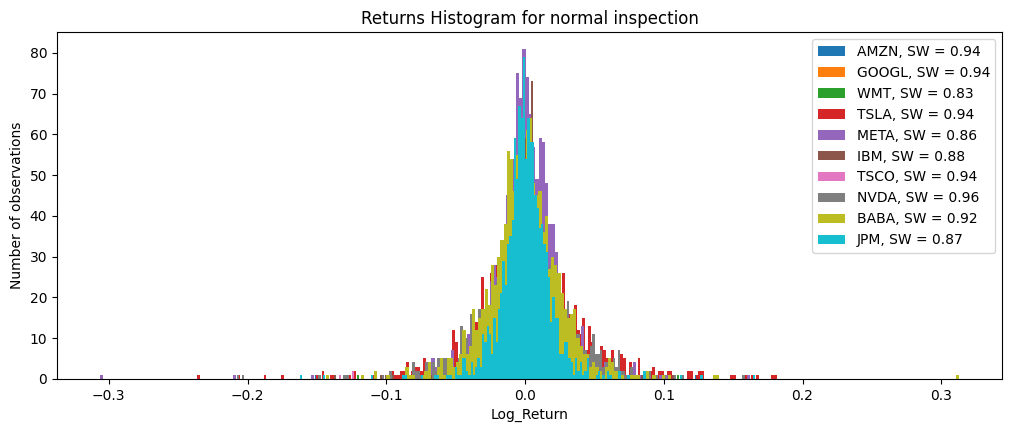

In [10]:
from scipy import stats

plt.figure(figsize=(12.2,4.5)) 
for i in df_ret.columns.values[:10]:
    sw_test = stats.shapiro(df_ret[i])
    plt.hist( df_ret[i],  label = f"{i}, SW = {round(sw_test.statistic, 2)}", bins = 200)

plt.title('Returns Histogram for normal inspection')
plt.xlabel('Log_Return')
plt.ylabel('Number of observations')
plt.legend()#df_ret.columns.values[:10])
plt.show()

### Computing the correlation Matrix

The idea in this part is to compute eigenvalues and eigenvectors of the covariance matrix 

$
C_{ij} = \frac{1}{T}\sum_{t=1}^T\delta x_i(t). \delta x_j(t)
$

This matrix will have a density of eigenvalues of 

$
\rho_C(\lambda) = \frac{1}{N} \frac{dn(\lambda)}{d\lambda}
$


As described in

$Laloux, Laurent, et al. "Noise dressing of financial correlation matrices." Physical review letters 83.7 (1999): 1467.$

In [11]:
from numpy.linalg import eig

corr_df = df_ret.corr()
corr_df.head()

,AMZN,GOOGL,WMT,TSLA,META,IBM,TSCO,NVDA,BABA,JPM,...,AHT,BOX,LYG,HPS,BWG,NWE,BP,OCN,CE,NQP
AMZN,1.000000,0.675923,0.293636,0.417954,0.621529,0.309154,0.375861,0.636894,0.435093,0.307247,...,0.095261,0.424945,0.219467,0.255686,0.254820,0.141584,0.193301,0.163188,0.295541,0.143958
GOOGL,0.675923,1.000000,0.316337,0.414028,0.674723,0.445996,0.397995,0.663660,0.444939,0.491963,...,0.195602,0.431369,0.381023,0.391076,0.377944,0.293070,0.354470,0.263374,0.487103,0.257493
WMT,0.293636,0.316337,1.000000,0.155712,0.233475,0.311792,0.354808,0.297505,0.123349,0.261886,...,0.009033,0.158210,0.143516,0.154152,0.168800,0.321581,0.141180,0.134511,0.206780,0.098881
TSLA,0.417954,0.414028,0.155712,1.000000,0.350452,0.220171,0.272981,0.470810,0.337366,0.281211,...,0.170220,0.295279,0.238232,0.348120,0.318756,0.155037,0.247114,0.195575,0.304902,0.216075
META,0.621529,0.674723,0.233475,0.350452,1.000000,0.278082,0.316217,0.577997,0.428588,0.355736,...,0.139956,0.382245,0.281195,0.324169,0.304476,0.191854,0.249324,0.224697,0.359097,0.222672


The idea now is to compute the eigenvalues and the eigenvactors, determine the density of eigenvalues using the formula below and plot it

In [49]:
# Calculating eigenvectors and eigenvalues
w,v = eig(corr_df)


array([30.87771083,  5.1965347 ,  3.89954778,  2.71344565,  2.04900213,
        1.55039088,  1.41538164,  1.32219598,  1.17203718,  1.07174718,
        1.04004804,  1.01529872,  0.97652922,  0.95544942,  0.91784943,
        0.89340994,  0.8743873 ,  0.85805607,  0.82893197,  0.81400921,
        0.77940973,  0.76154811,  0.73901094,  0.73537719,  0.7157416 ,
        0.63770932,  0.68475549,  0.65985837,  0.6725185 ,  0.61449549,
        0.60248884,  0.57332294,  0.5645566 ,  0.11464651,  0.13553513,
        0.54438763,  0.5499092 ,  0.14525084,  0.51587589,  0.51042601,
        0.15634586,  0.15861691,  0.16599852,  0.5045035 ,  0.48048243,
        0.48217852,  0.45256652,  0.4630497 ,  0.17539438,  0.18527877,
        0.44349224,  0.47082263,  0.43436701,  0.42183736,  0.41273862,
        0.40359567,  0.19553325,  0.20270054,  0.20750756,  0.21109404,
        0.21308465,  0.3938258 ,  0.37603979,  0.36574497,  0.35623705,
        0.22229374,  0.22419914,  0.34048134,  0.23613294,  0.32